In [1]:
# https://www.kaggle.com/meaninglesslives/finding-connected-images-in-python

In [2]:
%run ./utils.ipynb

In [3]:
trn = Path(PATH/TRAIN_DN/'101/images')
tst = Path(PATH/TEST_DN/'101/images')

In [4]:
from itertools import chain

In [5]:
%%time
ims = np.stack([open_image(p)[:, :, 0] for p in chain(trn.iterdir(), tst.iterdir())])

CPU times: user 9.58 s, sys: 540 ms, total: 10.1 s
Wall time: 10.1 s


In [62]:
all_arr = ims
all_arr = (all_arr - all_arr.mean()) / all_arr.std()

In [63]:
all_u_ex = 2*all_arr[:,0,:] - all_arr[:,1,:]
all_u_ex = (all_u_ex - all_u_ex.mean()) / all_u_ex.std()

all_d_ex = 2*all_arr[:,100,:]-all_arr[:,99,:]
all_d_ex = (all_d_ex - all_d_ex.mean()) / all_d_ex.std()

all_l_ex=  2*all_arr[:,:,0]-all_arr[:,:,1]
all_l_ex = (all_l_ex - all_l_ex.mean()) / all_l_ex.std()

all_r_ex=  2*all_arr[:,:,100]-all_arr[:,:,99]
all_r_ex = (all_r_ex - all_r_ex.mean()) / all_r_ex.std()

In [64]:
from annoy import AnnoyIndex

In [185]:
def get_nn_and_ratio(v):
    ns, dists = t.get_nns_by_vector(v, 2, include_distances=True)
    return ns[0], 1 - dists[0]/(dists[1] + 1e-5)

In [ ]:
# neighbors on the right

In [188]:
n = 22_000

In [189]:
t = AnnoyIndex(101)

In [190]:
%%time
for i in range(n):
    t.add_item(i, all_l_ex[i, :])

CPU times: user 192 ms, sys: 20 ms, total: 212 ms
Wall time: 219 ms


In [191]:
%%time
t.build(100)

CPU times: user 3.97 s, sys: 16 ms, total: 3.99 s
Wall time: 3.99 s


True

In [192]:
%%time
res = []
for i in range(n):
    res.append(get_nn_and_ratio(all_r_ex[i]))

CPU times: user 4.79 s, sys: 0 ns, total: 4.79 s
Wall time: 4.83 s


In [193]:
ns = pd.DataFrame(data=res, columns=['n_id', 'r'])

In [205]:
ns.to_csv('../data/n_right.csv', index=False)

In [196]:
ns.head()

,n_id,r
0,6519,0.005356
1,20773,0.004378
2,21872,0.049536
3,20233,0.093814
4,13254,0.002562


In [202]:
ns[ns.r !=1].sort_values(ascending=False, by='r').head(10)

,n_id,r
8228,16347,0.887776
20620,17082,0.885455
11098,15194,0.870226
9027,6359,0.864362
12244,2644,0.863398
2174,7537,0.862621
20809,4335,0.862555
1466,17657,0.861967
11018,594,0.847393
5887,15415,0.837851


In [177]:
ns[ns.r != 1][ns.r > 0.4].head()

/home/radek/anaconda3/envs/fastai_n/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,n_id,r
21,364,0.659444
22,20339,0.595151
35,12452,0.629164
55,8723,0.474717
71,3855,0.694925


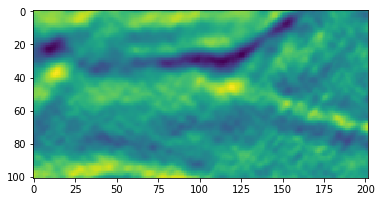

In [203]:
plt.imshow(np.concatenate((all_arr[8228], all_arr[16347]), axis=1))